In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160604)

mnist = input_data.read_data_sets("Mnistdata/", one_hot=True)

Extracting Mnistdata/train-images-idx3-ubyte.gz
Extracting Mnistdata/train-labels-idx1-ubyte.gz
Extracting Mnistdata/t10k-images-idx3-ubyte.gz
Extracting Mnistdata/t10k-labels-idx1-ubyte.gz


In [2]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))

f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())

In [3]:
i = 0
for _ in range(2000) :
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x : batch_xs, t : batch_ts})
    
    if i % 100 == 0 :
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x : mnist.test.images, t : mnist.test.labels})
        print('Step : %d, Loss : %f, Accuracy : %f' % (i, loss_val, acc_val))

Step : 100, Loss : 7603.950684, Accuracy : 0.843900
Step : 200, Loss : 5407.811523, Accuracy : 0.875000
Step : 300, Loss : 4557.000488, Accuracy : 0.889000
Step : 400, Loss : 4080.687012, Accuracy : 0.899900
Step : 500, Loss : 3805.030762, Accuracy : 0.901500
Step : 600, Loss : 3606.050293, Accuracy : 0.906600
Step : 700, Loss : 3471.418457, Accuracy : 0.908700
Step : 800, Loss : 3334.456055, Accuracy : 0.910100
Step : 900, Loss : 3255.497559, Accuracy : 0.913600
Step : 1000, Loss : 3184.460449, Accuracy : 0.913600
Step : 1100, Loss : 3117.749756, Accuracy : 0.914800
Step : 1200, Loss : 3076.547119, Accuracy : 0.915800
Step : 1300, Loss : 3029.109375, Accuracy : 0.916800
Step : 1400, Loss : 2993.091064, Accuracy : 0.917000
Step : 1500, Loss : 2970.937012, Accuracy : 0.917800
Step : 1600, Loss : 2931.386230, Accuracy : 0.919000
Step : 1700, Loss : 2901.072754, Accuracy : 0.919400
Step : 1800, Loss : 2898.370605, Accuracy : 0.920500
Step : 1900, Loss : 2892.741699, Accuracy : 0.919700
St

In [6]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict = {x : images, t : labels})

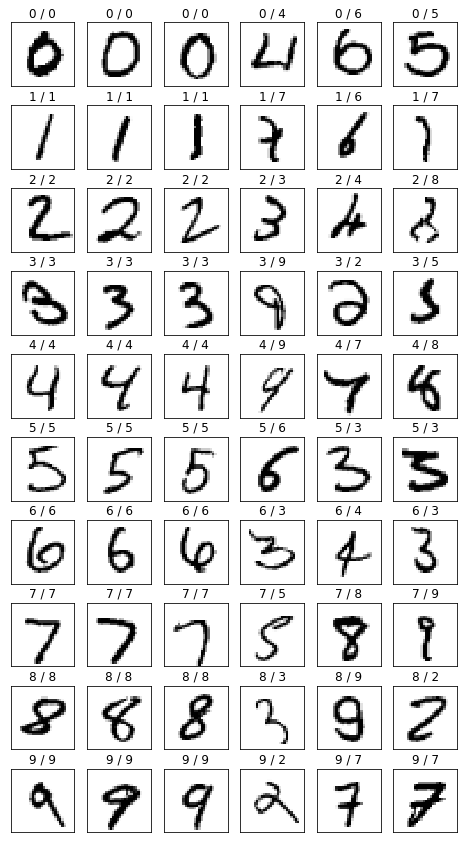

In [10]:
fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if(c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10, 6, i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' %(prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = "nearest")
            c += 1
            if c > 6 :
                break